# MathML to Nemeth Braille Translation Analysis

This notebook analyzes the results from translating **MathML to Nemeth braille** using Gemini 3 Pro.

**File analyzed:** `to-Nemeth-gemini-3-pro-preview-312exs-2160tests.txt`

**Configuration:**
- Model: gemini-3-pro-preview
- Number of examples: 312
- Number of tests: 2160

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Force reload of analysis_utils to get latest version
import importlib
import analysis_utils
importlib.reload(analysis_utils)

from analysis_utils import (
    parse_result_file,
    create_dataframe_from_results,
    compute_accuracy_by_bins,
    compute_accuracy_by_feature,
    print_summary_statistics
)

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## 1. Load and Parse Data

In [2]:
# Parse the result file
results = parse_result_file('../results/to-Nemeth-gemini-3-pro-preview-312exs-2160tests.txt')
print(f"Loaded {len(results)} translation results")

# Convert to DataFrame with computed metrics
df = create_dataframe_from_results(results, input_is_braille=False)

# Display first few rows
df.head(10)

,is_correct,input,expected,computed,input_length,expected_length,computed_length,mathml_elements,expected_braille_length,computed_braille_length,input_has_frac,input_has_sup,input_has_sub,input_has_sqrt,input_has_matrix,input_num_elements,input_nesting_depth
0,True,"<math><mrow><mi>f</mi><mo stretchy=""false"">(</...",⠋⠷⠞⠾⠀⠨⠅⠀⠁⠃⠘⠞,⠋⠷⠞⠾⠀⠨⠅⠀⠁⠃⠘⠞,153,12,12,11,12,12,False,True,False,False,False,11,4
1,False,"<math><mrow><mi>g</mi><mo stretchy=""false"">(</...",⠛⠷⠞⠾⠀⠨⠅⠀⠁⠃⠘⠞⠐⠬⠉,⠛⠷⠞⠾⠀⠨⠅⠀⠁⠃⠘⠞⠬⠉,173,15,14,13,15,14,False,True,False,False,False,13,4
2,True,<math><mn>10</mn></math>,⠼⠂⠴,⠼⠂⠴,24,3,3,2,3,3,False,False,False,False,False,2,2
3,True,<math><mrow><mn>2</mn><mo>+</mo><mn>3</mn><mo>...,⠼⠆⠬⠒⠀⠨⠅⠀⠼⠢⠸⠒,⠼⠆⠬⠒⠀⠨⠅⠀⠼⠢⠸⠒,92,12,12,8,12,12,False,False,False,False,False,8,3
4,True,<math><mn>2</mn></math>,⠼⠆,⠼⠆,23,2,2,2,2,2,False,False,False,False,False,2,2
5,False,<math><mrow><mn>2</mn><mo>⋅</mo><mn>3</mn><mo>...,⠼⠆⠡⠒⠀⠨⠅⠀⠼⠖⠸⠲,⠼⠆⠈⠡⠒⠀⠨⠅⠀⠼⠖⠸⠲,92,12,13,8,12,13,False,False,False,False,False,8,3
6,False,<math><mrow><mi>f</mi><mo>:</mo><mi>B</mi><mo ...,⠰⠋⠸⠒⠀⠠⠃⠀⠫⠕⠀⠠⠉⠠,⠰⠋⠸⠒⠠⠃⠀⠫⠕⠀⠠⠉⠠,124,14,13,8,14,13,False,False,False,False,False,8,3
7,True,"<math><mrow><mo stretchy=""false"">(</mo><mi>f</...",⠷⠋⠨⠡⠛⠾⠷⠭⠾⠀⠨⠅⠀⠋⠷⠛⠷⠭⠾⠾⠸⠲,⠷⠋⠨⠡⠛⠾⠷⠭⠾⠀⠨⠅⠀⠋⠷⠛⠷⠭⠾⠾⠸⠲,338,22,22,19,22,22,False,False,False,False,False,19,3
8,True,<math><mi>g</mi></math>,⠰⠛,⠰⠛,23,2,2,2,2,2,False,False,False,False,False,2,2
9,True,<math><mi>f</mi></math>,⠰⠋,⠰⠋,23,2,2,2,2,2,False,False,False,False,False,2,2


## 2. Overall Summary Statistics

In [3]:
print_summary_statistics(df, "MathML to Nemeth Braille Translation Results")


        MathML to Nemeth Braille Translation Results        

Total translations: 2160
Correct: 909
Incorrect: 1251
Overall accuracy: 42.08%

                     Length Statistics                      
------------------------------------------------------------
       input_length  expected_length  computed_length
count   2160.000000      2160.000000      2160.000000
mean     172.648611        17.131481        16.865741
std      222.097674        28.489198        24.913124
min       23.000000         1.000000         1.000000
25%       67.000000         5.000000         5.000000
50%      116.000000        10.000000        11.000000
75%      203.000000        19.000000        20.000000
max     3476.000000       542.000000       408.000000


## 3. Length-Based Analysis

### 3.1 Accuracy by MathML Input Length

In [4]:
# Define custom bins for MathML length
mathml_bins = [0, 50, 100, 200, 400, 800, 5000]

# Use helper function to compute accuracy by bins
accuracy_by_mathml_length, mathml_bin_series = compute_accuracy_by_bins(
    df, 'input_length', bins=mathml_bins, bin_column_name='mathml_length_bin'
)
df['mathml_length_bin'] = mathml_bin_series

print("\nAccuracy by MathML Input Length:")
print(accuracy_by_mathml_length)


Accuracy by MathML Input Length:
  mathml_length_bin  correct  total  accuracy  accuracy_pct
0    (-0.001, 50.0]      217    339    0.6401         64.01
1     (50.0, 100.0]      384    616    0.6234         62.34
2    (100.0, 200.0]      232    653    0.3553         35.53
3    (200.0, 400.0]       66    397    0.1662         16.62
4    (400.0, 800.0]       10    117    0.0855          8.55
5   (800.0, 5000.0]        0     38    0.0000          0.00


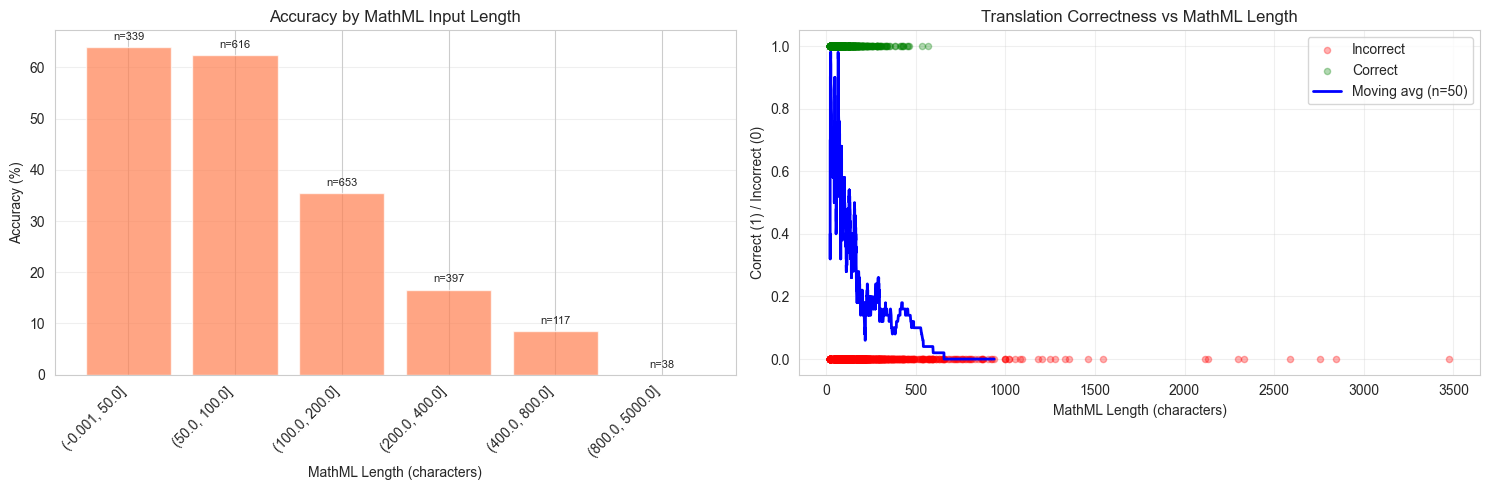

In [5]:
# Visualize accuracy by MathML length
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart of accuracy by length bin
bins_data = accuracy_by_mathml_length.reset_index()
bins_data['bin_label'] = bins_data['mathml_length_bin'].astype(str)
ax1.bar(range(len(bins_data)), bins_data['accuracy_pct'], color='coral', alpha=0.7)
ax1.set_xticks(range(len(bins_data)))
ax1.set_xticklabels(bins_data['bin_label'], rotation=45, ha='right')
ax1.set_xlabel('MathML Length (characters)')
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Accuracy by MathML Input Length')
ax1.grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, row in enumerate(bins_data.itertuples()):
    ax1.text(i, row.accuracy_pct + 1, f"n={row.total}", ha='center', va='bottom', fontsize=8)

# Scatter plot with trend line
correct = df[df['is_correct']]
incorrect = df[~df['is_correct']]

ax2.scatter(incorrect['input_length'], [0]*len(incorrect), alpha=0.3, c='red', label='Incorrect', s=20)
ax2.scatter(correct['input_length'], [1]*len(correct), alpha=0.3, c='green', label='Correct', s=20)

# Add moving average
df_sorted = df.sort_values('input_length')
window_size = 50
rolling_accuracy = df_sorted['is_correct'].rolling(window=window_size, center=True).mean()
ax2.plot(df_sorted['input_length'], rolling_accuracy, 'b-', linewidth=2, label=f'Moving avg (n={window_size})')

ax2.set_xlabel('MathML Length (characters)')
ax2.set_ylabel('Correct (1) / Incorrect (0)')
ax2.set_title('Translation Correctness vs MathML Length')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 3.2 Accuracy by Expected Braille Length

In [6]:
# Define bins for braille length
braille_bins = [0, 10, 20, 30, 50, 100, 200, 1000]

# Use helper function to compute accuracy by bins
accuracy_by_braille_length, braille_bin_series = compute_accuracy_by_bins(
    df, 'expected_braille_length', bins=braille_bins, bin_column_name='braille_length_bin'
)
df['braille_length_bin'] = braille_bin_series

print("\nAccuracy by Expected Braille Length:")
print(accuracy_by_braille_length)


Accuracy by Expected Braille Length:
  braille_length_bin  correct  total  accuracy  accuracy_pct
0     (-0.001, 10.0]      642   1089    0.5895         58.95
1       (10.0, 20.0]      194    591    0.3283         32.83
2       (20.0, 30.0]       46    231    0.1991         19.91
3       (30.0, 50.0]       19    135    0.1407         14.07
4      (50.0, 100.0]        5     87    0.0575          5.75
5     (100.0, 200.0]        3     18    0.1667         16.67
6    (200.0, 1000.0]        0      9    0.0000          0.00


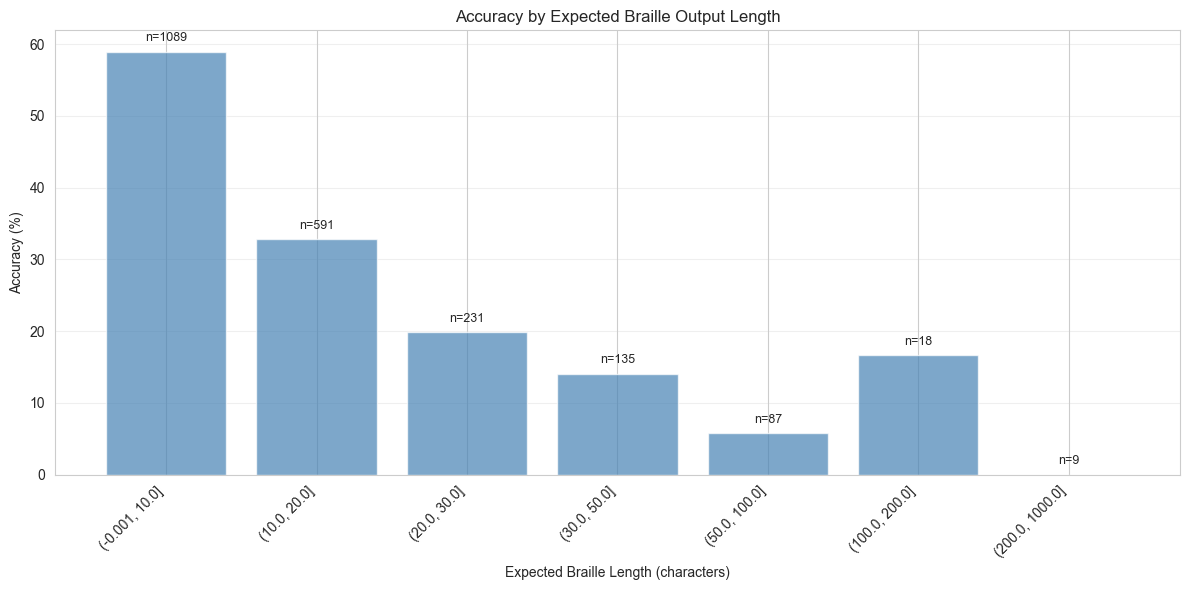

In [7]:
# Visualize accuracy by braille length
fig, ax = plt.subplots(figsize=(12, 6))

bins_data = accuracy_by_braille_length.reset_index()
bins_data['bin_label'] = bins_data['braille_length_bin'].astype(str)
bars = ax.bar(range(len(bins_data)), bins_data['accuracy_pct'], color='steelblue', alpha=0.7)
ax.set_xticks(range(len(bins_data)))
ax.set_xticklabels(bins_data['bin_label'], rotation=45, ha='right')
ax.set_xlabel('Expected Braille Length (characters)')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy by Expected Braille Output Length')
ax.grid(axis='y', alpha=0.3)

# Add labels
for i, row in enumerate(bins_data.itertuples()):
    ax.text(i, row.accuracy_pct + 1, f"n={row.total}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### 3.3 2D Heatmap: MathML Length vs Braille Length

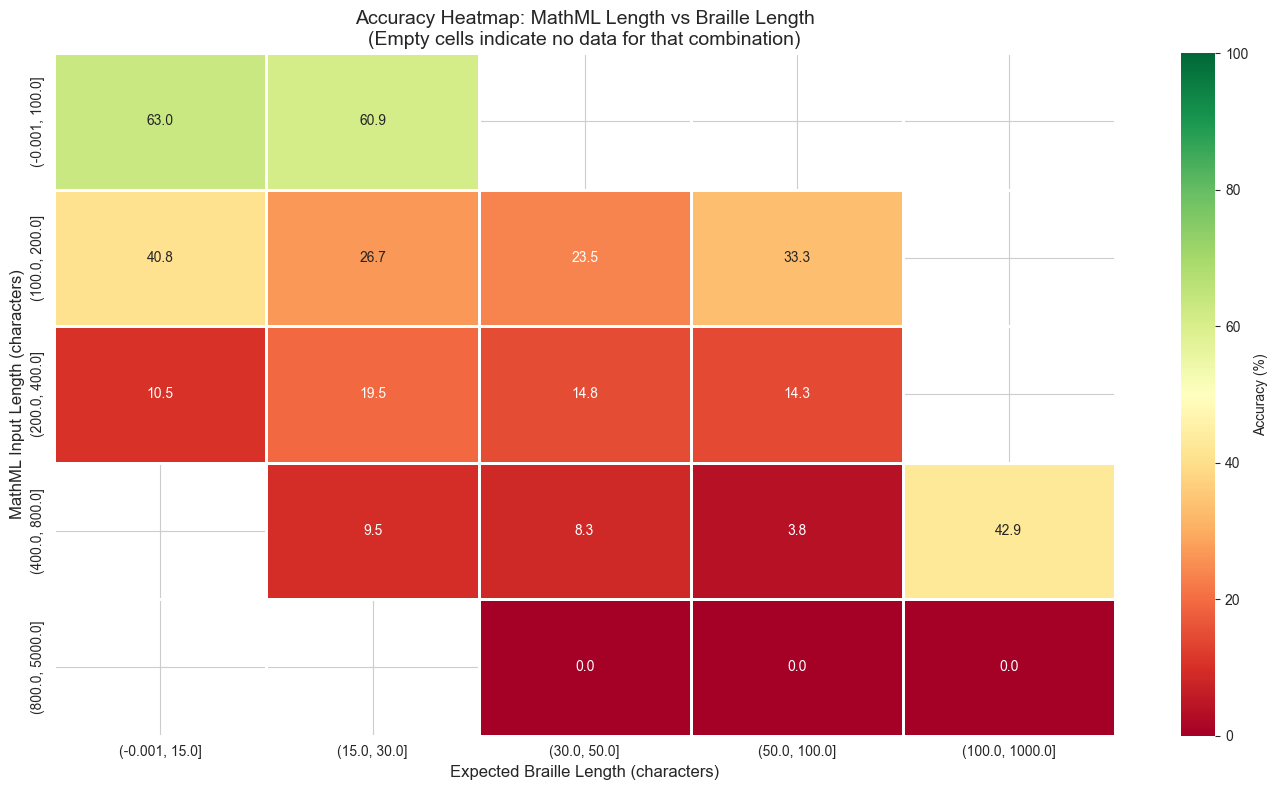

In [8]:
# Create 2D bins
mathml_bins_2d = [0, 100, 200, 400, 800, 5000]
braille_bins_2d = [0, 15, 30, 50, 100, 1000]

df['mathml_bin_2d'] = pd.cut(df['input_length'], bins=mathml_bins_2d, include_lowest=True)
df['braille_bin_2d'] = pd.cut(df['expected_braille_length'], bins=braille_bins_2d, include_lowest=True)

# Create pivot table for heatmap
pivot = df.groupby(['mathml_bin_2d', 'braille_bin_2d'], observed=True)['is_correct'].agg(['mean', 'count'])
pivot_accuracy = pivot['mean'].unstack(fill_value=np.nan) * 100
pivot_counts = pivot['count'].unstack(fill_value=0)

# Plot heatmap with better NaN handling
fig, ax = plt.subplots(figsize=(14, 8))

# Create annotations that show count and accuracy, or "N/A" for NaN
annot_labels = pivot_accuracy.copy()
for i in range(len(pivot_accuracy.index)):
    for j in range(len(pivot_accuracy.columns)):
        val = pivot_accuracy.iloc[i, j]
        count = pivot_counts.iloc[i, j]
        if pd.isna(val) or count == 0:
            annot_labels.iloc[i, j] = np.nan
        else:
            annot_labels.iloc[i, j] = val

# Plot heatmap
sns.heatmap(pivot_accuracy, annot=annot_labels, fmt='.1f', cmap='RdYlGn',
            vmin=0, vmax=100, cbar_kws={'label': 'Accuracy (%)'},
            linewidths=1, linecolor='white', ax=ax,
            cbar=True, square=False, 
            mask=pivot_accuracy.isna())

ax.set_xlabel('Expected Braille Length (characters)', fontsize=12)
ax.set_ylabel('MathML Input Length (characters)', fontsize=12)
ax.set_title('Accuracy Heatmap: MathML Length vs Braille Length\n(Empty cells indicate no data for that combination)', fontsize=14)
plt.tight_layout()
plt.show()

## 4. MathML Complexity Analysis

### 4.1 Accuracy by MathML Features

In [9]:
print("Sample counts per cell:")
print(pivot_counts)

Sample counts per cell:
braille_bin_2d   (-0.001, 15.0]  (15.0, 30.0]  (30.0, 50.0]  (50.0, 100.0]  \
mathml_bin_2d                                                                
(-0.001, 100.0]             932            23             0              0   
(100.0, 200.0]              412           221            17              3   
(200.0, 400.0]               76           226            81             14   
(400.0, 800.0]                0            21            36             53   
(800.0, 5000.0]               0             0             1             17   

braille_bin_2d   (100.0, 1000.0]  
mathml_bin_2d                     
(-0.001, 100.0]                0  
(100.0, 200.0]                 0  
(200.0, 400.0]                 0  
(400.0, 800.0]                 7  
(800.0, 5000.0]               20  


In [10]:
# Analyze accuracy by presence of different MathML features in INPUT
features = ['input_has_frac', 'input_has_sup', 'input_has_sub', 
            'input_has_sqrt', 'input_has_matrix']

feature_analysis = {}
for feature in features:
    if feature in df.columns:
        feature_analysis[feature] = compute_accuracy_by_feature(df, feature)

# Display results
for feature, stats in feature_analysis.items():
    print(f"\n{feature}:")
    print(stats)


input_has_frac:
   input_has_frac  correct_count  total_count  accuracy  accuracy_pct
0           False            707         1618    0.4370         43.70
1            True            202          542    0.3727         37.27

input_has_sup:
   input_has_sup  correct_count  total_count  accuracy  accuracy_pct
0          False            785         1678    0.4678         46.78
1           True            124          482    0.2573         25.73

input_has_sub:
   input_has_sub  correct_count  total_count  accuracy  accuracy_pct
0          False            867         1961    0.4421         44.21
1           True             42          199    0.2111         21.11

input_has_sqrt:
   input_has_sqrt  correct_count  total_count  accuracy  accuracy_pct
0           False            839         1955    0.4292         42.92
1            True             70          205    0.3415         34.15

input_has_matrix:
   input_has_matrix  correct_count  total_count  accuracy  accuracy_pct
0        

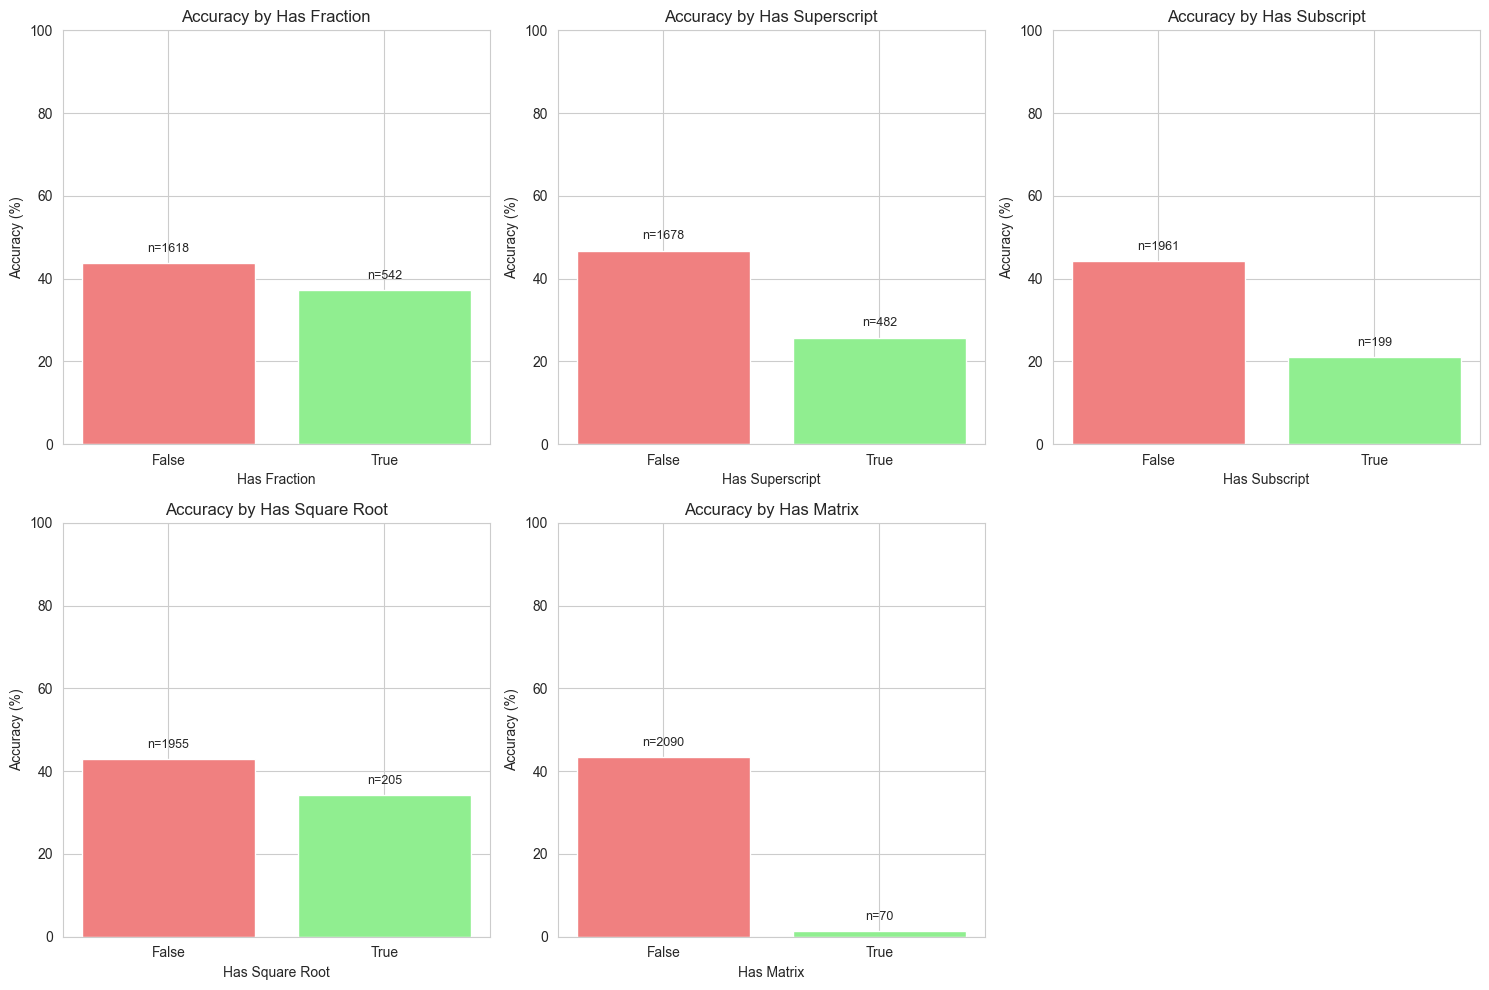

In [11]:
# Visualize accuracy by features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

feature_labels = {
    'input_has_frac': 'Has Fraction',
    'input_has_sup': 'Has Superscript',
    'input_has_sub': 'Has Subscript',
    'input_has_sqrt': 'Has Square Root',
    'input_has_matrix': 'Has Matrix'
}

for idx, (feature, label) in enumerate(feature_labels.items()):
    if feature in df.columns and idx < len(axes):
        stats = feature_analysis[feature]
        
        bars = axes[idx].bar(stats[feature].astype(str), stats['accuracy_pct'], 
                            color=['lightcoral', 'lightgreen'])
        axes[idx].set_xlabel(label)
        axes[idx].set_ylabel('Accuracy (%)')
        axes[idx].set_title(f'Accuracy by {label}')
        axes[idx].set_ylim(0, 100)
        
        # Add count labels
        for i, row in enumerate(stats.itertuples()):
            axes[idx].text(i, row.accuracy_pct + 2, f"n={row.total_count}", 
                          ha='center', va='bottom', fontsize=9)

# Hide unused subplot
if len(feature_labels) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

### 4.2 Accuracy by Number of MathML Elements

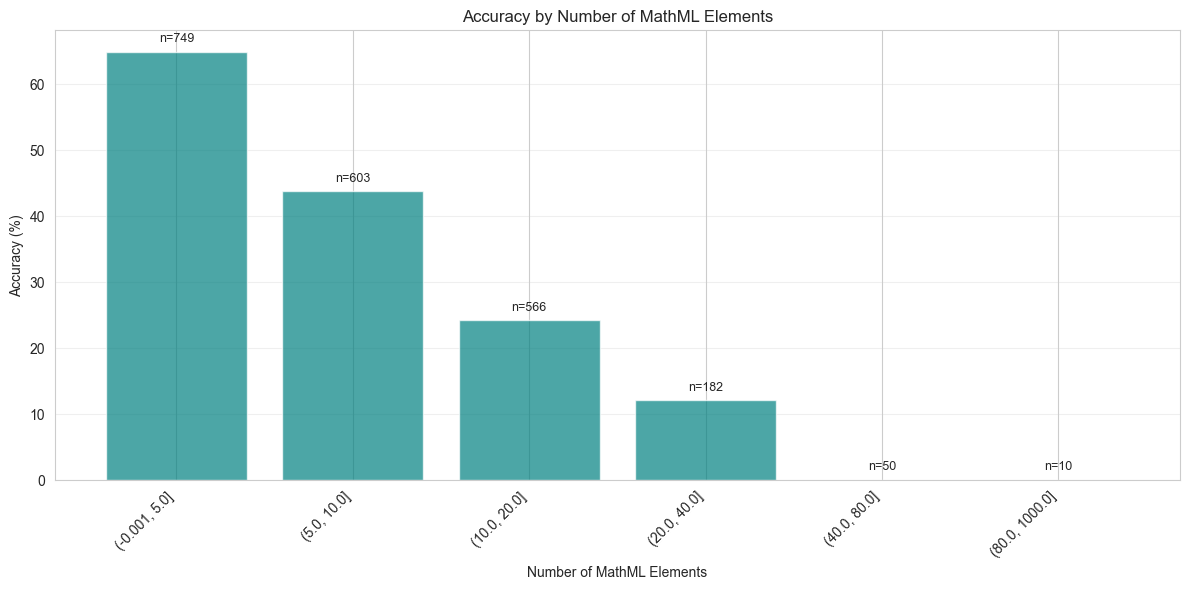

In [12]:
# Analyze by number of elements
if 'mathml_elements' in df.columns:
    # Define bins for element count
    element_bins = [0, 5, 10, 20, 40, 80, 1000]
    
    # Use helper function to compute accuracy by bins
    element_analysis, element_bin_series = compute_accuracy_by_bins(
        df, 'mathml_elements', bins=element_bins, bin_column_name='element_bin'
    )
    df['element_bin'] = element_bin_series
    
    print("\nAccuracy by Number of MathML Elements:")
    print(element_analysis)
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(range(len(element_analysis)), element_analysis['accuracy_pct'], color='teal', alpha=0.7)
    ax.set_xticks(range(len(element_analysis)))
    ax.set_xticklabels(element_analysis['element_bin'].astype(str), rotation=45, ha='right')
    ax.set_xlabel('Number of MathML Elements')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title('Accuracy by Number of MathML Elements')
    ax.grid(axis='y', alpha=0.3)
    
    # Add sample size labels
    for i, row in enumerate(element_analysis.itertuples()):
        ax.text(i, row.accuracy_pct + 1, f"n={int(row.total)}", 
               ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()

### 4.3 Accuracy by MathML Nesting Depth

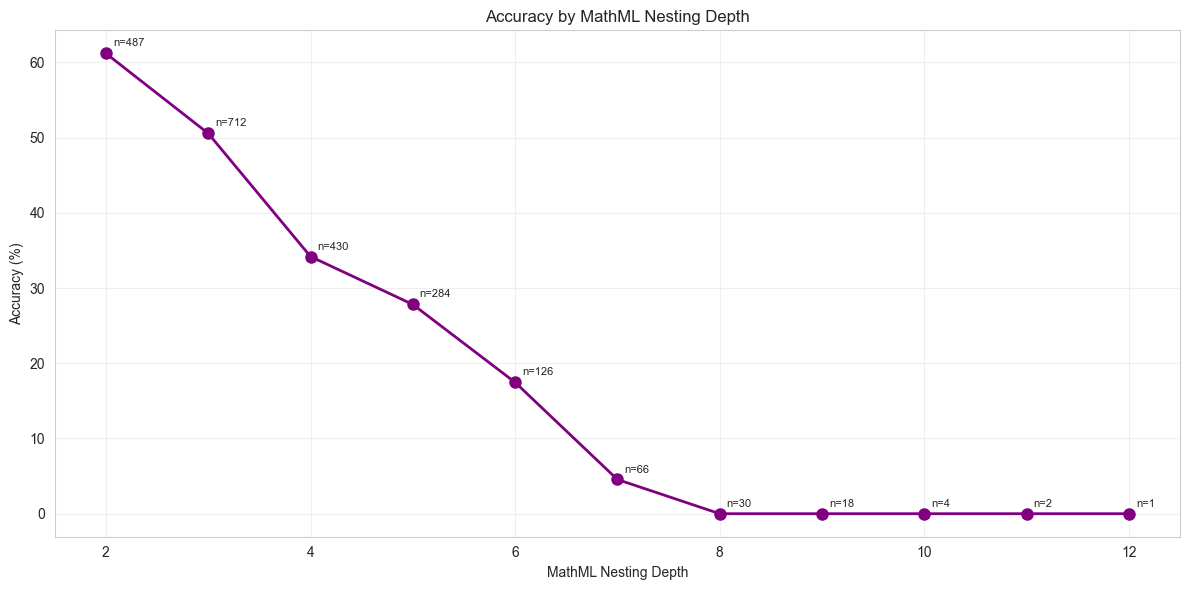

In [13]:
# Analyze by nesting depth
if 'input_nesting_depth' in df.columns:
    depth_analysis = df.groupby('input_nesting_depth').agg({
        'is_correct': ['sum', 'count', 'mean']
    }).round(4)
    depth_analysis.columns = ['correct', 'total', 'accuracy']
    depth_analysis['accuracy_pct'] = (depth_analysis['accuracy'] * 100).round(2)
    
    print("\nAccuracy by MathML Nesting Depth:")
    print(depth_analysis)
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    depth_data = depth_analysis.reset_index()
    ax.plot(depth_data['input_nesting_depth'], depth_data['accuracy_pct'], 
           marker='o', linewidth=2, markersize=8, color='purple')
    ax.set_xlabel('MathML Nesting Depth')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title('Accuracy by MathML Nesting Depth')
    ax.grid(alpha=0.3)
    
    # Add sample size labels
    for _, row in depth_data.iterrows():
        ax.annotate(f"n={int(row['total'])}", 
                   xy=(row['input_nesting_depth'], row['accuracy_pct']),
                   xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    plt.tight_layout()
    plt.show()

## 5. Distribution Analysis

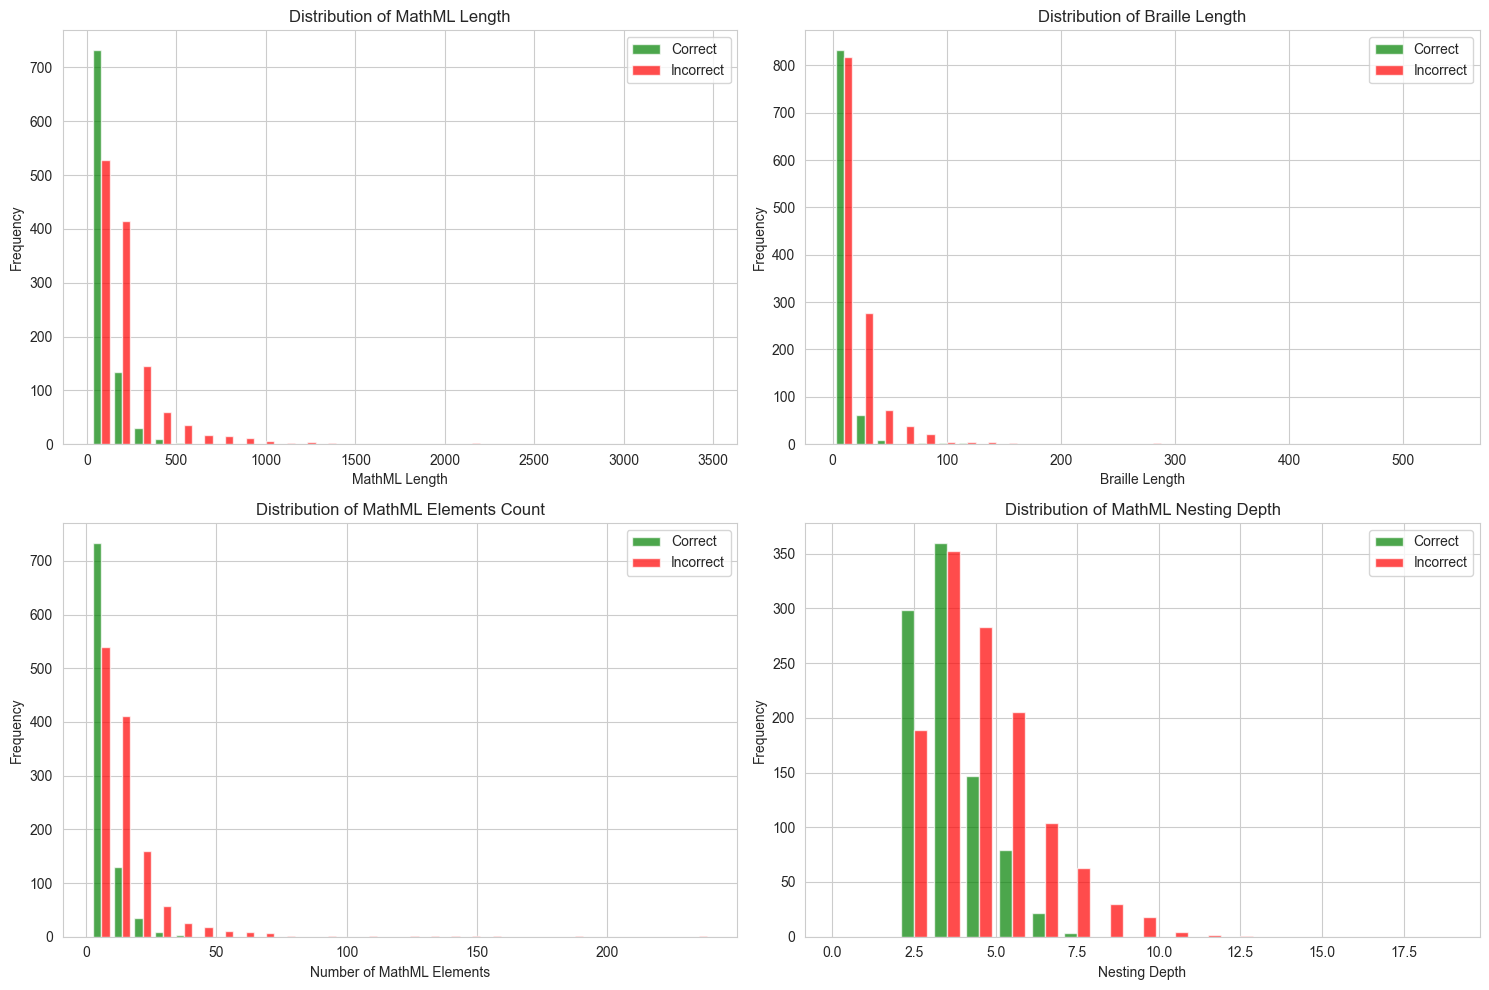

In [14]:
# Compare distributions of correct vs incorrect translations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

correct_df = df[df['is_correct']]
incorrect_df = df[~df['is_correct']]

# MathML length distribution
axes[0, 0].hist([correct_df['input_length'], incorrect_df['input_length']], 
                bins=30, label=['Correct', 'Incorrect'], alpha=0.7, color=['green', 'red'])
axes[0, 0].set_xlabel('MathML Length')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of MathML Length')
axes[0, 0].legend()

# Braille length distribution
axes[0, 1].hist([correct_df['expected_braille_length'], incorrect_df['expected_braille_length']], 
                bins=30, label=['Correct', 'Incorrect'], alpha=0.7, color=['green', 'red'])
axes[0, 1].set_xlabel('Braille Length')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Braille Length')
axes[0, 1].legend()

# Number of elements distribution
if 'mathml_elements' in df.columns:
    axes[1, 0].hist([correct_df['mathml_elements'], incorrect_df['mathml_elements']], 
                    bins=30, label=['Correct', 'Incorrect'], alpha=0.7, color=['green', 'red'])
    axes[1, 0].set_xlabel('Number of MathML Elements')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Distribution of MathML Elements Count')
    axes[1, 0].legend()

# Nesting depth distribution
if 'input_nesting_depth' in df.columns:
    axes[1, 1].hist([correct_df['input_nesting_depth'], incorrect_df['input_nesting_depth']], 
                    bins=range(0, 20), label=['Correct', 'Incorrect'], alpha=0.7, color=['green', 'red'])
    axes[1, 1].set_xlabel('Nesting Depth')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Distribution of MathML Nesting Depth')
    axes[1, 1].legend()

plt.tight_layout()
plt.show()